<a href="https://colab.research.google.com/github/Wiggle-Ryutsuki/MAI-KMUTT-CPE-38/blob/main/HW4_Data_VisualizationEDA_3473.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [1]:
import pandas as pd

In [2]:
# Write your code here
superstore_order = pd.read_csv("superstore_order.csv")
superstore_people = pd.read_csv("superstore_people.csv")
superstore_return = pd.read_csv("superstore_return.csv")

2. Determine shape of each dataset (print out the results as well).

In [3]:
# Write your code here
print(superstore_order.shape)
print(superstore_people.shape)
print(superstore_return.shape)

(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [4]:
# Write your code here
superstore_order.info()
superstore_people.info()
superstore_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

4. Are there any missing values? If so, in which column?

Ans: **No, there are no missing values.**

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [5]:
import matplotlib.pyplot as plt

In [6]:
# 5.1
unique_segments =  superstore_order["Segment"].unique()
unique_segments

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [7]:
# 5.2
segment_counts = superstore_order["Segment"].value_counts()
segment_counts

,count
Segment,
Consumer,4613
Corporate,2673
Home Office,1594


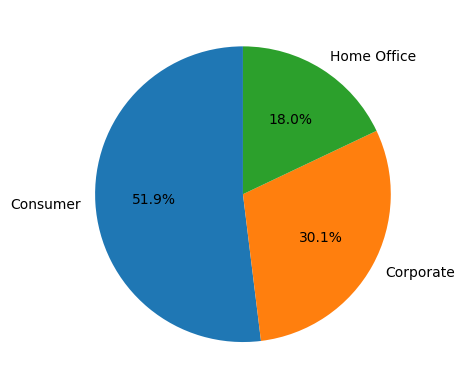

In [8]:
# 5.3
plt.pie(segment_counts, labels = unique_segments, autopct='%1.1f%%', startangle=90)
plt.show()

Answer for the question 5.4

Ans: **From the pie chart, we can interpret that Consumers, at 51.1%, make up the majority of the customers. One-third of the customers are from Corporate businesses. And lastly, Home Offices, or self-employed indiciduals, make up the least amount of orders.**

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [9]:
# 6.1
unique_states = superstore_order['State'].unique()
unique_states

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [10]:
# 6.2
state_counts = superstore_order['State'].value_counts().head(10)
state_counts

,count
State,
California,1754
New York,1001
Texas,860
Pennsylvania,531
Washington,452
Illinois,427
Ohio,396
Florida,339
Michigan,230


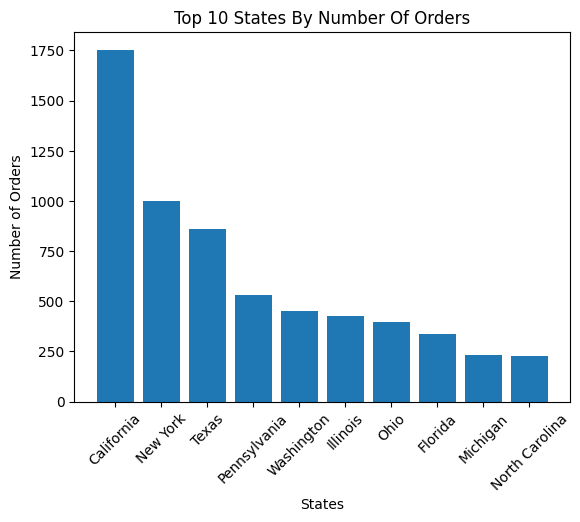

In [11]:
# 6.3
plt.bar(state_counts.index, state_counts.values)
plt.title("Top 10 States By Number Of Orders")
plt.xlabel("States")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

In [12]:
# 6.4
state_df = state_counts.reset_index() # Turn into df
state_sales = superstore_order.groupby("State")["Sales"].sum().reset_index() # Get all sales and turn into df

result_df = state_df.merge(state_sales, on="State") # Le merge
result_df


,State,count,Sales
0,California,1754,399195.4555
1,New York,1001,274866.8190
2,Texas,860,147855.0282
3,Pennsylvania,531,103852.5210
4,Washington,452,124497.7780
5,Illinois,427,71456.1780
6,Ohio,396,67924.2140
7,Florida,339,84083.0880
8,Michigan,230,62147.6960
9,North Carolina,229,49962.1580


Answer for the question 6.5

Ans: **From this information, I can see that we have the highest amount of sales in California, with almost 400K sales. Second highest comes from New York and third place comes Texas. My conclusion would be to maintain popularity in those states and start branching and advertizing more in the other states.**

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [13]:
# 7.1
unique_cat = superstore_order["Category"].unique()
unique_cat

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

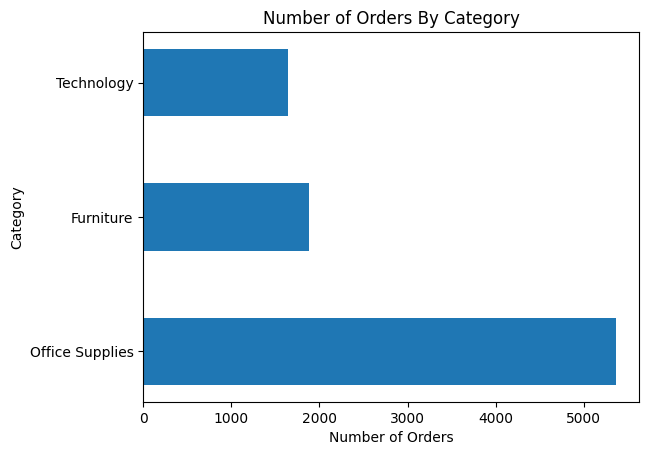

In [14]:
# 7.2
cat_count = superstore_order["Category"].value_counts()
plt.barh(cat_count.index, cat_count.values, height=0.5)
plt.title("Number of Orders By Category")
plt.xlabel("Number of Orders")
plt.ylabel("Category")
plt.show()

In [16]:
# 7.3
cat_ratio = (cat_count/cat_count.sum()) * 100
print(cat_ratio.round(2))

Category
Office Supplies    60.36
Furniture          21.17
Technology         18.47
Name: count, dtype: float64


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [30]:
# previous type: "object"
superstore_order["Ship Date"] = pd.to_datetime(superstore_order["Ship Date"], format="%d/%m/%Y")
print(f"Check type: {superstore_order["Ship Date"].dtypes}") # Check

Check type: datetime64[ns]


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [36]:
superstore_order["Order Date"] = pd.to_datetime(superstore_order["Order Date"], format="%d/%m/%Y")
superstore_order["Processing Time Day"] = (superstore_order["Ship Date"] - superstore_order["Order Date"]).dt.days
# Checking if Ship Date - Order Date = Processing Time Day
superstore_order[["Order Date", "Ship Date", "Processing Time Day"]].head()


,Order Date,Ship Date,Processing Time Day
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


In [37]:
# Check rq
superstore_order.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Processing Time Day'],
      dtype='object')

10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [50]:
# 10.1
Vdays = (superstore_order["Processing Time Day"] > 5).sum()
print(f"Orders that take more than 5 days to process: {Vdays}")

Orders that take more than 5 days to process: 1656


In [53]:
# 10.2
# I interpreted this as "first 5 rows", not top high ranking rows by quantity
superstore_order[["Order ID", "Order Date", "Ship Date", "Processing Time Day", "Quantity"]].head(5)

,Order ID,Order Date,Ship Date,Processing Time Day,Quantity
0,CA-2016-152156,2016-11-08,2016-11-11,3,2
1,CA-2016-152156,2016-11-08,2016-11-11,3,3
2,CA-2016-138688,2016-06-12,2016-06-16,4,2
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2


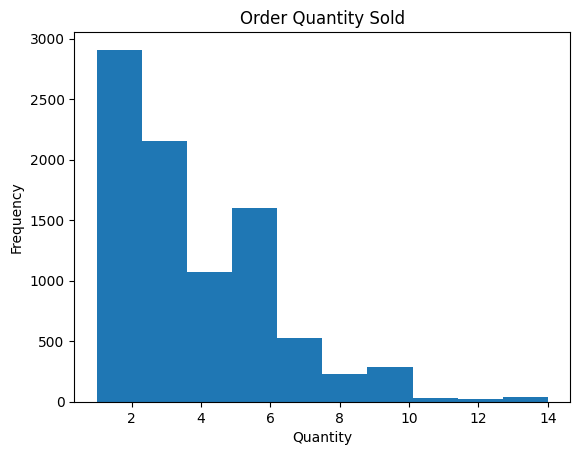

In [61]:
# 10.3

plt.hist(superstore_order["Quantity"])
plt.title("Order Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

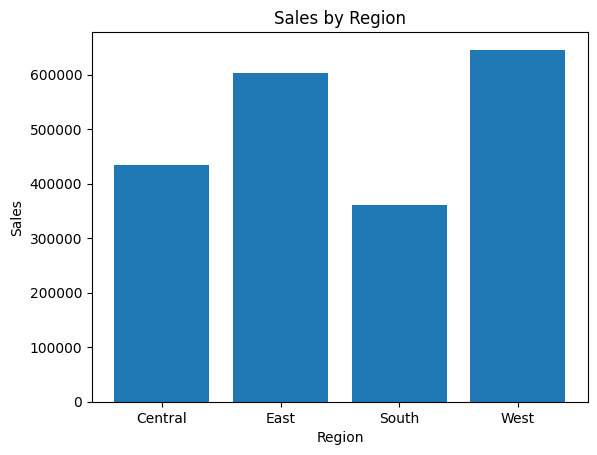

In [66]:
# Write your code here (11.1)
total_sales = superstore_order.groupby("Region")["Sales"].sum()
plt.bar(total_sales.index, total_sales.values)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans:
  **The West region records the highest total sales, at roughly 650,000, making it the strongest-performing region.  The second highest is the East region. with 600,000 sales. Only slightly lower than the West, still contributes to a major share of total sales. The Central region sits in the middle, with sales of approximately 430,000. The South region has the lowest total sales, at around 360,000. This indicates that the South may have lower demand compared to the other regions.**

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans:

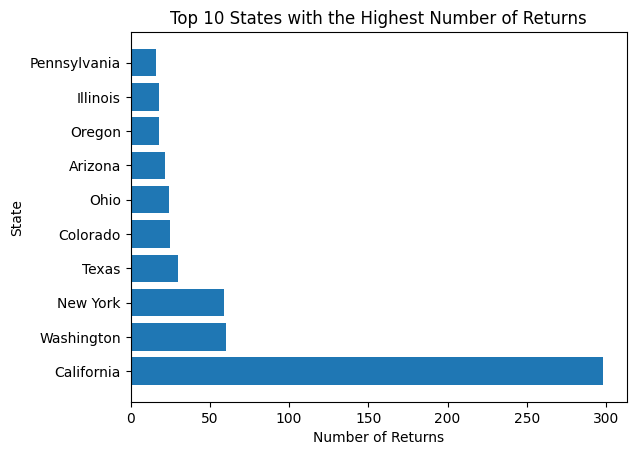

In [96]:
# Write your code here (12)
state_returns_df = superstore_return.merge(superstore_order[["Order ID", "State"]],
    on="Order ID",
    how="inner"
)

state_returns = state_returns_df["State"].value_counts().head(10)
plt.barh(state_returns.index, state_returns.values)
plt.title("Top 10 States with the Highest Number of Returns")
plt.xlabel("Number of Returns")
plt.ylabel("State")
plt.show()

13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

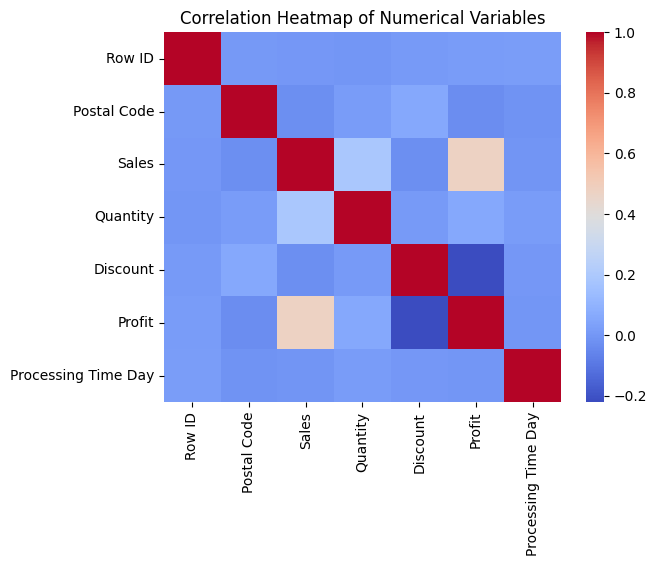

In [104]:
# Write your code here (13)
import seaborn as sns
num_data = superstore_order.select_dtypes(include="number")

num_corr = num_data.corr()

sns.heatmap(num_corr, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [112]:
# Write your code here (14)
import plotly.express as px

state_sales = (superstore_order.groupby("State")["Sales"].sum().reset_index())

us_state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT",
    "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN",
    "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
    "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM",
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR",
    "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}
state_sales["State_Code"] = state_sales["State"].map(us_state_abbrev)

fig = px.choropleth(
    state_sales,
    locations="State_Code",
    locationmode="USA-states",
    color="Sales",
    scope="usa",
    color_continuous_scale="Blues",
    title="Total Sales by U.S. State"
)

fig.show()

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:


1.   California
2.   Large gaps in values make the rest of the map stay pale to highlight the largest value.
3. Yes, color scales with higher contrast makes it easier to read. The color might also affect how you read the map (Heavy values, like red, makes it look like a danger zone)



15. Create a box plot to compare the different shipping modes based on total profit.

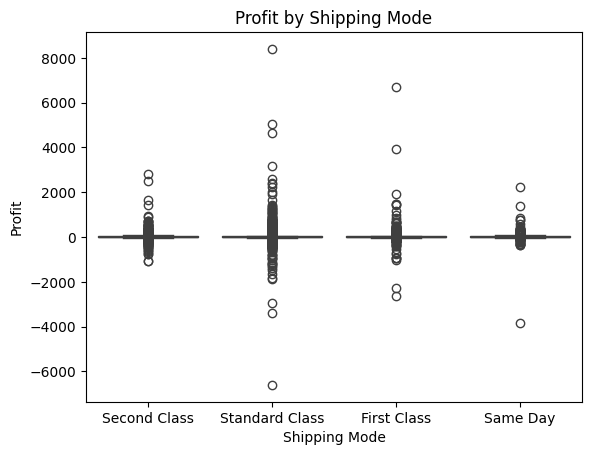

In [114]:
#Write your code here (15)
sns.boxplot(
    x="Ship Mode",
    y="Profit",
    data=superstore_order
)
plt.title("Profit by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Profit")
plt.show()

15.2 Which shipping mode has the highest median profit?

Ans: **Standard Shipping has the highest median.**

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [117]:
# B1
orders_returns = superstore_order.merge(superstore_return,on="Order ID")
returns_per_customer = (orders_returns[orders_returns["Returned"] == "Yes"].groupby("Customer ID")["Order ID"].nunique())

total_customers = orders_returns["Customer ID"].nunique()

returned_once = (returns_per_customer == 1).sum()
percentage_returned_once = (returned_once / total_customers) * 100

print(f"Percentage of customers who returned product once: {percentage_returned_once.round(2)}")

Percentage of customers who returned product once: 83.78


In [125]:
# B2
total_customers = superstore_order["Customer ID"].nunique()
returned_at_least_once = returns_per_customer.shape[0]
percentage_returned_atleast_once = (returned_at_least_once / total_customers) * 100

print(f"Percentage of customers who returned product at least once: {percentage_returned_atleast_once}")

Percentage of customers who returned product at least once: 28.13688212927757


In [126]:
never_returned = total_customers - returned_at_least_once
percentage_never_returned = (never_returned / total_customers) * 100

print(f"Percent of customers who never returned: {percentage_never_returned}")

Percent of customers who never returned: 71.86311787072243


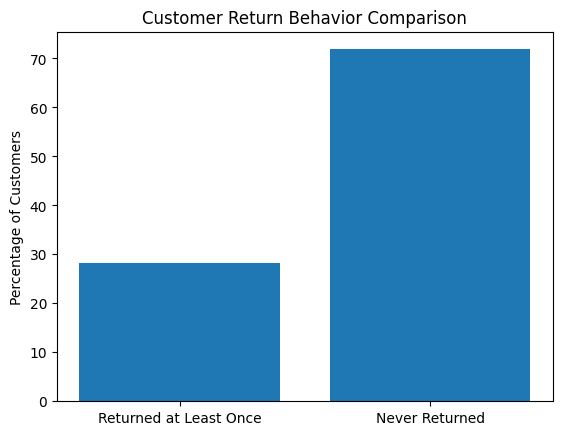

In [127]:
labels = ["Returned at Least Once", "Never Returned"]
values = [percentage_returned_atleast_once, percentage_never_returned]

plt.bar(labels, values)
plt.title("Customer Return Behavior Comparison")
plt.ylabel("Percentage of Customers")
plt.show()